In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
Base=automap_base()

In [5]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found


In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

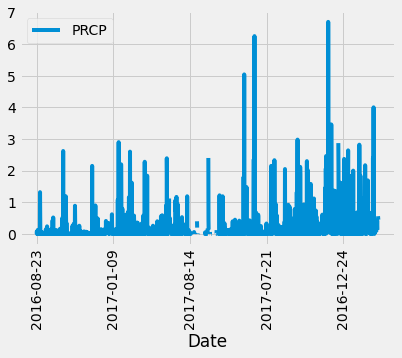

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
from datetime import date


year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date>=year_ago).all()

prcp_rows = [{"Date": result[0], "PRCP": result[1]} for result in results]
#prcp_rows

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=["Date","PRCP"])




# Sort the dataframe by date
df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="Date",y="PRCP",rot=90)
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame(prcp_rows).describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active=session.query(measurement.station,func.count((measurement.station))).group_by(measurement.station).order_by(func.count(measurement.station).desc())
for act in active:
    print(act)




    

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()






[(54.0, 85.0, 71.66378066378067)]

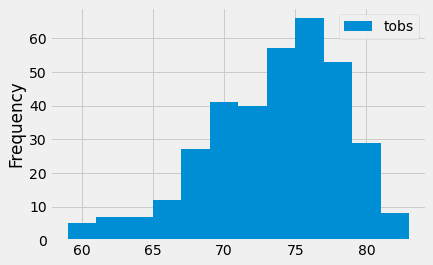

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results_two=session.query(measurement.tobs).\
    filter(measurement.date>=year_ago,measurement.station=="USC00519281").all()
df_two=pd.DataFrame(results_two,columns=["tobs"]) 

df_two.plot.hist(bins=12)
plt.xlabel="Temperature"

# Close session

In [21]:
# Close Session
session.close()